<a href="https://colab.research.google.com/github/b2200765028/mach-learning/blob/main/fashionmnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [542]:
import torch
import numpy as np
import torchvision
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image



In [543]:
train_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))])

In [544]:
train_data= torchvision.datasets.FashionMNIST("/files/",train=True, download=True,
                             transform=train_transform)

In [545]:
test_data = torchvision.datasets.FashionMNIST("/files/",train=False, download=True,
                             transform=train_transform)

In [546]:
train_loader =DataLoader(batch_size=64,dataset=train_data,shuffle=True)
test_loader = DataLoader(batch_size=64,dataset=test_data,shuffle=True)


Label is  2


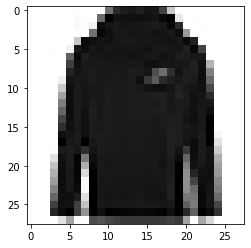

In [547]:
idx,(img,label) = next(enumerate(train_loader))

plt.tight_layout()
##plt.imshow(img[0],cmap="binary")
plt.imshow(torch.squeeze(img[0]),cmap="binary")
print("Label is ",label[0].numpy())
    

In [548]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.linear = nn.Sequential(
                
                nn.Flatten(),
                nn.Linear(28*28,256),
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(256,128),
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(128,64),
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(64,10)
            
              

                
            )   
            
    def forward(self,x):

        x = self.linear(x)
        
        return (x)




In [549]:
class Model(nn.Module):
    def __init__(self):
          super(Model,self).__init__()
        
          self.conv1 = nn.Sequential(
              
              nn.Conv2d(1,8,kernel_size=3,stride = 1,padding =1 ),
              nn.ReLU(),
              nn.BatchNorm2d(8),
              nn.MaxPool2d(2,2),
              nn.Conv2d(8,16,3,1,1),
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.MaxPool2d(2,2),
              nn.Conv2d(16,24,3,1,1),
              nn.Dropout2d(0.2),
              nn.ReLU(),
              nn.MaxPool2d(2,2)
            )

          self.lin1 = nn.Linear(216,100)
          self.lin2=  nn.Linear(100,30)
        
          self.lin3 = nn.Linear(30,10)          
            
    def forward(self,x):

        x = self.conv1(x)
        x = x.view(x.shape[0],-1)
        x = nn.functional.relu(self.lin1(x))
    
        x = nn.functional.relu(self.lin2(x))
        x = self.lin3(x)
        
        return (x)


In [550]:
model = Model()
model.to(device)
# Define our loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [551]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [552]:
from tqdm import tqdm
epochs = 10
steps = 0
print_every = 128
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in tqdm(train_loader,desc=f"Training model  epoch {e}/{epochs}"):
        steps += 1

        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions

        images = images.to(device)
        labels = labels.to(device)

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                model.eval()
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    log_ps = model(images)
                    test_loss += criterion(log_ps, labels)

                    ps = torch.exp(log_ps)
            
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            model.train()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))
          

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                  "Test Loss: {:.3f}.. ".format(test_losses[-1]),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Training model  epoch 0/10:  14%|█▍        | 136/938 [00:03<00:43, 18.59it/s]

Epoch: 1/10..  Training Loss: 0.106..  Test Loss: 0.490..  Test Accuracy: 0.816


Training model  epoch 0/10:  28%|██▊       | 266/938 [00:07<00:34, 19.69it/s]

Epoch: 1/10..  Training Loss: 0.174..  Test Loss: 0.446..  Test Accuracy: 0.842


Training model  epoch 0/10:  42%|████▏     | 393/938 [00:10<00:29, 18.64it/s]

Epoch: 1/10..  Training Loss: 0.233..  Test Loss: 0.442..  Test Accuracy: 0.839


Training model  epoch 0/10:  56%|█████▌    | 522/938 [00:13<00:22, 18.52it/s]

Epoch: 1/10..  Training Loss: 0.287..  Test Loss: 0.400..  Test Accuracy: 0.852


Training model  epoch 0/10:  69%|██████▉   | 648/938 [00:16<00:16, 17.69it/s]

Epoch: 1/10..  Training Loss: 0.343..  Test Loss: 0.397..  Test Accuracy: 0.852


Training model  epoch 0/10:  84%|████████▎ | 784/938 [00:20<00:08, 19.13it/s]

Epoch: 1/10..  Training Loss: 0.396..  Test Loss: 0.402..  Test Accuracy: 0.850


Training model  epoch 0/10:  97%|█████████▋| 911/938 [00:23<00:01, 18.59it/s]

Epoch: 1/10..  Training Loss: 0.447..  Test Loss: 0.383..  Test Accuracy: 0.856


Training model  epoch 1/10:  11%|█         | 99/938 [00:02<00:43, 19.16it/s]

Epoch: 2/10..  Training Loss: 0.032..  Test Loss: 0.386..  Test Accuracy: 0.854


Training model  epoch 1/10:  24%|██▍       | 227/938 [00:05<00:37, 19.18it/s]

Epoch: 2/10..  Training Loss: 0.079..  Test Loss: 0.371..  Test Accuracy: 0.866


Training model  epoch 1/10:  37%|███▋      | 350/938 [00:09<00:31, 18.63it/s]

Epoch: 2/10..  Training Loss: 0.126..  Test Loss: 0.356..  Test Accuracy: 0.868


Training model  epoch 1/10:  51%|█████     | 477/938 [00:12<00:24, 18.87it/s]

Epoch: 2/10..  Training Loss: 0.174..  Test Loss: 0.357..  Test Accuracy: 0.870


Training model  epoch 1/10:  65%|██████▌   | 613/938 [00:15<00:16, 19.35it/s]

Epoch: 2/10..  Training Loss: 0.220..  Test Loss: 0.346..  Test Accuracy: 0.875


Training model  epoch 1/10:  78%|███████▊  | 736/938 [00:18<00:10, 19.47it/s]

Epoch: 2/10..  Training Loss: 0.265..  Test Loss: 0.346..  Test Accuracy: 0.870


Training model  epoch 1/10:  92%|█████████▏| 865/938 [00:21<00:03, 19.22it/s]

Epoch: 2/10..  Training Loss: 0.312..  Test Loss: 0.353..  Test Accuracy: 0.868


Training model  epoch 2/10:   6%|▌         | 57/938 [00:02<00:49, 17.89it/s]

Epoch: 3/10..  Training Loss: 0.015..  Test Loss: 0.359..  Test Accuracy: 0.868


Training model  epoch 2/10:  20%|█▉        | 184/938 [00:05<00:40, 18.70it/s]

Epoch: 3/10..  Training Loss: 0.055..  Test Loss: 0.329..  Test Accuracy: 0.880


Training model  epoch 2/10:  33%|███▎      | 313/938 [00:08<00:32, 18.97it/s]

Epoch: 3/10..  Training Loss: 0.099..  Test Loss: 0.348..  Test Accuracy: 0.877


Training model  epoch 2/10:  47%|████▋     | 439/938 [00:11<00:27, 18.32it/s]

Epoch: 3/10..  Training Loss: 0.141..  Test Loss: 0.330..  Test Accuracy: 0.883


Training model  epoch 2/10:  60%|██████    | 566/938 [00:15<00:23, 15.56it/s]

Epoch: 3/10..  Training Loss: 0.183..  Test Loss: 0.311..  Test Accuracy: 0.888


Training model  epoch 2/10:  74%|███████▍  | 698/938 [00:19<00:12, 18.83it/s]

Epoch: 3/10..  Training Loss: 0.227..  Test Loss: 0.320..  Test Accuracy: 0.884


Training model  epoch 2/10:  87%|████████▋ | 819/938 [00:22<00:06, 18.09it/s]

Epoch: 3/10..  Training Loss: 0.270..  Test Loss: 0.308..  Test Accuracy: 0.889


Training model  epoch 3/10:   1%|          | 10/938 [00:01<02:16,  6.81it/s]

Epoch: 4/10..  Training Loss: 0.000..  Test Loss: 0.327..  Test Accuracy: 0.879


Training model  epoch 3/10:  15%|█▌        | 144/938 [00:05<00:49, 16.14it/s]

Epoch: 4/10..  Training Loss: 0.040..  Test Loss: 0.404..  Test Accuracy: 0.850


Training model  epoch 3/10:  29%|██▉       | 272/938 [00:10<00:42, 15.80it/s]

Epoch: 4/10..  Training Loss: 0.081..  Test Loss: 0.321..  Test Accuracy: 0.882


Training model  epoch 3/10:  42%|████▏     | 397/938 [00:13<00:37, 14.45it/s]

Epoch: 4/10..  Training Loss: 0.120..  Test Loss: 0.321..  Test Accuracy: 0.882


Training model  epoch 3/10:  56%|█████▋    | 528/938 [00:17<00:27, 14.93it/s]

Epoch: 4/10..  Training Loss: 0.162..  Test Loss: 0.312..  Test Accuracy: 0.890


Training model  epoch 3/10:  70%|██████▉   | 655/938 [00:21<00:18, 14.93it/s]

Epoch: 4/10..  Training Loss: 0.202..  Test Loss: 0.304..  Test Accuracy: 0.891


Training model  epoch 3/10:  83%|████████▎ | 780/938 [00:24<00:08, 17.82it/s]

Epoch: 4/10..  Training Loss: 0.242..  Test Loss: 0.318..  Test Accuracy: 0.886


Training model  epoch 3/10:  97%|█████████▋| 908/938 [00:28<00:01, 19.11it/s]

Epoch: 4/10..  Training Loss: 0.284..  Test Loss: 0.312..  Test Accuracy: 0.883


Training model  epoch 4/10:  10%|█         | 96/938 [00:02<00:45, 18.46it/s]

Epoch: 5/10..  Training Loss: 0.026..  Test Loss: 0.298..  Test Accuracy: 0.893


Training model  epoch 4/10:  24%|██▍       | 224/938 [00:06<00:37, 19.02it/s]

Epoch: 5/10..  Training Loss: 0.066..  Test Loss: 0.291..  Test Accuracy: 0.897


Training model  epoch 4/10:  38%|███▊      | 354/938 [00:09<00:29, 19.80it/s]

Epoch: 5/10..  Training Loss: 0.104..  Test Loss: 0.297..  Test Accuracy: 0.893


Training model  epoch 4/10:  51%|█████▏    | 483/938 [00:12<00:23, 19.00it/s]

Epoch: 5/10..  Training Loss: 0.143..  Test Loss: 0.288..  Test Accuracy: 0.893


Training model  epoch 4/10:  65%|██████▌   | 610/938 [00:15<00:17, 19.26it/s]

Epoch: 5/10..  Training Loss: 0.180..  Test Loss: 0.301..  Test Accuracy: 0.891


Training model  epoch 4/10:  79%|███████▊  | 738/938 [00:18<00:10, 19.36it/s]

Epoch: 5/10..  Training Loss: 0.217..  Test Loss: 0.295..  Test Accuracy: 0.894


Training model  epoch 4/10:  92%|█████████▏| 866/938 [00:22<00:04, 17.82it/s]

Epoch: 5/10..  Training Loss: 0.256..  Test Loss: 0.286..  Test Accuracy: 0.899


Training model  epoch 5/10:   6%|▌         | 54/938 [00:02<00:52, 16.70it/s]

Epoch: 6/10..  Training Loss: 0.013..  Test Loss: 0.307..  Test Accuracy: 0.891


Training model  epoch 5/10:  20%|█▉        | 186/938 [00:05<00:39, 18.95it/s]

Epoch: 6/10..  Training Loss: 0.050..  Test Loss: 0.309..  Test Accuracy: 0.886


Training model  epoch 5/10:  33%|███▎      | 313/938 [00:08<00:33, 18.75it/s]

Epoch: 6/10..  Training Loss: 0.087..  Test Loss: 0.290..  Test Accuracy: 0.894


Training model  epoch 5/10:  47%|████▋     | 440/938 [00:12<00:27, 18.24it/s]

Epoch: 6/10..  Training Loss: 0.124..  Test Loss: 0.297..  Test Accuracy: 0.893


Training model  epoch 5/10:  60%|██████    | 565/938 [00:15<00:21, 17.74it/s]

Epoch: 6/10..  Training Loss: 0.160..  Test Loss: 0.296..  Test Accuracy: 0.894


Training model  epoch 5/10:  75%|███████▍  | 699/938 [00:18<00:13, 18.12it/s]

Epoch: 6/10..  Training Loss: 0.197..  Test Loss: 0.299..  Test Accuracy: 0.893


Training model  epoch 5/10:  88%|████████▊ | 824/938 [00:22<00:06, 18.02it/s]

Epoch: 6/10..  Training Loss: 0.235..  Test Loss: 0.299..  Test Accuracy: 0.895


Training model  epoch 6/10:   1%|▏         | 12/938 [00:01<01:47,  8.63it/s]

Epoch: 7/10..  Training Loss: 0.001..  Test Loss: 0.316..  Test Accuracy: 0.886


Training model  epoch 6/10:  15%|█▌        | 145/938 [00:05<00:43, 18.33it/s]

Epoch: 7/10..  Training Loss: 0.037..  Test Loss: 0.295..  Test Accuracy: 0.894


Training model  epoch 6/10:  29%|██▉       | 273/938 [00:08<00:38, 17.48it/s]

Epoch: 7/10..  Training Loss: 0.073..  Test Loss: 0.293..  Test Accuracy: 0.892


Training model  epoch 6/10:  42%|████▏     | 397/938 [00:11<00:30, 17.65it/s]

Epoch: 7/10..  Training Loss: 0.108..  Test Loss: 0.311..  Test Accuracy: 0.890


Training model  epoch 6/10:  57%|█████▋    | 530/938 [00:15<00:22, 18.36it/s]

Epoch: 7/10..  Training Loss: 0.145..  Test Loss: 0.297..  Test Accuracy: 0.893


Training model  epoch 6/10:  70%|███████   | 658/938 [00:18<00:15, 18.46it/s]

Epoch: 7/10..  Training Loss: 0.182..  Test Loss: 0.273..  Test Accuracy: 0.901


Training model  epoch 6/10:  84%|████████▎ | 785/938 [00:22<00:10, 14.50it/s]

Epoch: 7/10..  Training Loss: 0.217..  Test Loss: 0.286..  Test Accuracy: 0.898


Training model  epoch 6/10:  97%|█████████▋| 910/938 [00:26<00:01, 16.00it/s]

Epoch: 7/10..  Training Loss: 0.253..  Test Loss: 0.310..  Test Accuracy: 0.890


Training model  epoch 7/10:  10%|█         | 98/938 [00:03<00:50, 16.78it/s]

Epoch: 8/10..  Training Loss: 0.022..  Test Loss: 0.282..  Test Accuracy: 0.899


Training model  epoch 7/10:  24%|██▍       | 226/938 [00:06<00:39, 17.96it/s]

Epoch: 8/10..  Training Loss: 0.057..  Test Loss: 0.302..  Test Accuracy: 0.895


Training model  epoch 7/10:  38%|███▊      | 352/938 [00:09<00:41, 14.03it/s]

Epoch: 8/10..  Training Loss: 0.092..  Test Loss: 0.297..  Test Accuracy: 0.891


Training model  epoch 7/10:  52%|█████▏    | 484/938 [00:13<00:24, 18.37it/s]

Epoch: 8/10..  Training Loss: 0.127..  Test Loss: 0.294..  Test Accuracy: 0.899


Training model  epoch 7/10:  65%|██████▌   | 611/938 [00:16<00:17, 18.24it/s]

Epoch: 8/10..  Training Loss: 0.162..  Test Loss: 0.300..  Test Accuracy: 0.896


Training model  epoch 7/10:  79%|███████▊  | 738/938 [00:19<00:10, 18.24it/s]

Epoch: 8/10..  Training Loss: 0.198..  Test Loss: 0.276..  Test Accuracy: 0.901


Training model  epoch 7/10:  92%|█████████▏| 865/938 [00:22<00:05, 13.91it/s]

Epoch: 8/10..  Training Loss: 0.234..  Test Loss: 0.270..  Test Accuracy: 0.903


Training model  epoch 8/10:   6%|▌         | 55/938 [00:02<01:08, 12.81it/s]

Epoch: 9/10..  Training Loss: 0.013..  Test Loss: 0.316..  Test Accuracy: 0.884


Training model  epoch 8/10:  20%|██        | 190/938 [00:05<00:40, 18.56it/s]

Epoch: 9/10..  Training Loss: 0.048..  Test Loss: 0.289..  Test Accuracy: 0.897


Training model  epoch 8/10:  34%|███▎      | 316/938 [00:09<00:35, 17.36it/s]

Epoch: 9/10..  Training Loss: 0.082..  Test Loss: 0.278..  Test Accuracy: 0.902


Training model  epoch 8/10:  47%|████▋     | 443/938 [00:12<00:26, 18.70it/s]

Epoch: 9/10..  Training Loss: 0.115..  Test Loss: 0.279..  Test Accuracy: 0.901


Training model  epoch 8/10:  61%|██████    | 568/938 [00:15<00:20, 17.84it/s]

Epoch: 9/10..  Training Loss: 0.149..  Test Loss: 0.281..  Test Accuracy: 0.898


Training model  epoch 8/10:  75%|███████▍  | 703/938 [00:18<00:12, 18.38it/s]

Epoch: 9/10..  Training Loss: 0.182..  Test Loss: 0.295..  Test Accuracy: 0.894


Training model  epoch 8/10:  88%|████████▊ | 830/938 [00:22<00:06, 17.97it/s]

Epoch: 9/10..  Training Loss: 0.216..  Test Loss: 0.297..  Test Accuracy: 0.896


Training model  epoch 9/10:   1%|▏         | 14/938 [00:01<01:33,  9.91it/s]

Epoch: 10/10..  Training Loss: 0.002..  Test Loss: 0.286..  Test Accuracy: 0.896


Training model  epoch 9/10:  15%|█▌        | 142/938 [00:05<00:44, 17.90it/s]

Epoch: 10/10..  Training Loss: 0.033..  Test Loss: 0.292..  Test Accuracy: 0.896


Training model  epoch 9/10:  29%|██▉       | 270/938 [00:08<00:35, 18.58it/s]

Epoch: 10/10..  Training Loss: 0.066..  Test Loss: 0.279..  Test Accuracy: 0.903


Training model  epoch 9/10:  43%|████▎     | 403/938 [00:11<00:27, 19.24it/s]

Epoch: 10/10..  Training Loss: 0.101..  Test Loss: 0.296..  Test Accuracy: 0.893


Training model  epoch 9/10:  57%|█████▋    | 530/938 [00:14<00:22, 17.93it/s]

Epoch: 10/10..  Training Loss: 0.135..  Test Loss: 0.279..  Test Accuracy: 0.899


Training model  epoch 9/10:  70%|██████▉   | 654/938 [00:18<00:15, 17.77it/s]

Epoch: 10/10..  Training Loss: 0.170..  Test Loss: 0.286..  Test Accuracy: 0.896


Training model  epoch 9/10:  84%|████████▎ | 785/938 [00:21<00:08, 18.89it/s]

Epoch: 10/10..  Training Loss: 0.204..  Test Loss: 0.278..  Test Accuracy: 0.902


Training model  epoch 9/10:  98%|█████████▊| 915/938 [00:24<00:01, 19.42it/s]

Epoch: 10/10..  Training Loss: 0.237..  Test Loss: 0.272..  Test Accuracy: 0.903


Training model  epoch 9/10: 100%|██████████| 938/938 [00:24<00:00, 37.82it/s]


In [553]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [566]:
test_acc = 0
for idx,(images, labels) in enumerate(test_loader):
                  model.eval()
                  with torch.no_grad():
                    
                    ##plt.imshow(torch.squeeze(images[0],dim=0),cmap="gray")
                    ##print("Truth => ",class_names[labels[0].numpy()])   used  to see image and my labels

                    images = images.to(device)
                    log_ps = model(images)
                    ##print("Guess=> ",class_names[torch.argmax(log_ps[0]).numpy()])

                    labels = labels.to(device)
                    ps = log_ps
            
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
          
                    equals = top_class == labels.view(-1,1)
                    test_acc +=equals.sum()


print("Accuracy is " , (test_acc.to("cpu")/(len(test_loader)*64)))

Accuracy is  tensor(0.8987)
